In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import csv
import seaborn as sns
import string
from collections import Counter

In [2]:
colnames = ['genre','filename', 'year','id', 'Similarity_score', 'Sentence_1', 'Sentence_2']

In [3]:
# Preprocessing for training dataset
sentence_train = pd.read_csv('/Users/dz/Desktop/MSCourses/CMPE255DataMining/Project/datasets/sts-train.csv', names= colnames, delimiter = '\t')
sentence_train.head()

,genre,filename,year,id,Similarity_score,Sentence_1,Sentence_2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.


In [4]:
# Clean training dataset
sentence_train.drop(columns = ['genre','filename','year','id'], inplace = True)
sentence_train.head()

,Similarity_score,Sentence_1,Sentence_2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.


In [5]:
# Preprocessing for testing dataset. Noticed qutotation marks.
sentence_test = pd.read_csv('/Users/dz/Desktop/MSCourses/CMPE255DataMining/Project/datasets/sts-test.csv', names= colnames, quoting = csv.QUOTE_NONE, delimiter = '\t')
sentence_test.head()

,genre,filename,year,id,Similarity_score,Sentence_1,Sentence_2
0,main-captions,MSRvid,2012test,24,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,main-captions,MSRvid,2012test,33,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,main-captions,MSRvid,2012test,45,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,main-captions,MSRvid,2012test,63,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,main-captions,MSRvid,2012test,66,1.5,A man is playing a harp.,A man is playing a keyboard.


In [6]:
# Clean testing dataset
sentence_test.drop(columns = ['genre','filename','year','id'], inplace = True)
sentence_test.head()

,Similarity_score,Sentence_1,Sentence_2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.5,A man is playing a harp.,A man is playing a keyboard.


In [7]:
# Preprocessing for dev dataset
sentence_dev = pd.read_csv('/Users/dz/Desktop/MSCourses/CMPE255DataMining/Project/datasets/sts-dev.csv', names= colnames, quoting = csv.QUOTE_NONE, delimiter = '\t')
sentence_dev.head()

,genre,filename,year,id,Similarity_score,Sentence_1,Sentence_2
0,main-captions,MSRvid,2012test,0,5.00,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.
1,main-captions,MSRvid,2012test,2,4.75,A young child is riding a horse.,A child is riding a horse.
2,main-captions,MSRvid,2012test,3,5.00,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
3,main-captions,MSRvid,2012test,7,2.40,A woman is playing the guitar.,A man is playing guitar.
4,main-captions,MSRvid,2012test,8,2.75,A woman is playing the flute.,A man is playing a flute.


In [8]:
# Clean dev dataset
sentence_dev.drop(columns = ['genre','filename','year','id'], inplace = True)
sentence_dev.head()

,Similarity_score,Sentence_1,Sentence_2
0,5.00,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.
1,4.75,A young child is riding a horse.,A child is riding a horse.
2,5.00,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
3,2.40,A woman is playing the guitar.,A man is playing guitar.
4,2.75,A woman is playing the flute.,A man is playing a flute.


In [9]:
# Print size of each 
print(f"Total train samples : {sentence_train.shape[0]}")
print(f"Total test samples : {sentence_test.shape[0]}")
print(f"Total validation samples : {sentence_dev.shape[0]}")

Total train samples : 5711
Total test samples : 1379
Total validation samples : 1500


In [10]:
# Select one row as sample from dataset
print(f"Sentence1: {sentence_train.loc[1, 'Sentence_1']}")
print(f"Sentence2: {sentence_train.loc[1, 'Sentence_2']}")
print(f"Similarity: {sentence_train.loc[1, 'Similarity_score']}")

Sentence1: A man is playing a large flute.
Sentence2: A man is playing a flute.
Similarity: 3.8


In [11]:
# checking how many NaN in training dataset
print ("Number of missing values: ")
print(sentence_train.isnull().sum())

Number of missing values: 
Similarity_score    0
Sentence_1          0
Sentence_2          3
dtype: int64


In [12]:
# drop missing values
sentence_train.dropna(axis = 0, inplace = True)
print(sentence_train.isnull().sum())

Similarity_score    0
Sentence_1          0
Sentence_2          0
dtype: int64


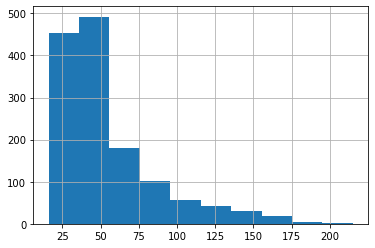

In [13]:
# Testing datset sample, I used histogram plot that represesnt sentences' length and count by x, y axis 
sentence_test['Sentence_1'].str.len().hist()
plt.show()

In [14]:
import nltk
# Install nltk all package, otherwise, it doesn't work
# link: https://www.nltk.org/data.html
# nltk.download()
STOP = set(nltk.corpus.stopwords.words("english"))

In [15]:
class Sentence:
    """
    Used as a base class to preprocess any 
    sentence by tokenizing and removing stopwords.
    This doesn't remove punctuations.
    """
    def __init__(self, sentence):
        self.raw = sentence
        normalized_sentence = sentence.replace("‘", "'").replace("’", "'")
        self.tokens = [t.lower() for t in nltk.word_tokenize(normalized_sentence)]
        self.tokens_without_stop = [t for t in self.tokens if t not in STOP]

In [16]:
Sentence_1 = [Sentence(s) for s in sentence_train['Sentence_1']]
Sentence_2 = [Sentence(str(s)) for s in sentence_train['Sentence_2']]

In [17]:
table = str.maketrans('', '', string.punctuation)
sen1_words = list()
sen2_words = list()

for i in range(0,len(Sentence_1)):
    
    stripped_1 = [w.translate(table) for w in Sentence_1[i].tokens_without_stop]
    stripped_2 = [w.translate(table) for w in Sentence_2[i].tokens_without_stop]
    
    sen1_words += stripped_1
    sen2_words += stripped_2

In [18]:
# Count frequency word and plot
word_freq_sentence1 = []
word_freq_sentence2 = []
word_freq_sentence1= Counter(sen1_words)  
word_freq_sentence2 = Counter(sen2_words)

colnames = ['Word','Frequency']
word_freq_sentence1 =  pd.DataFrame(sorted(word_freq_sentence1.items(), key=lambda pair: pair[1], reverse=True),columns=colnames)
word_freq_sentence2 =  pd.DataFrame(sorted(word_freq_sentence2.items(), key=lambda pair: pair[1], reverse=True),columns=colnames)

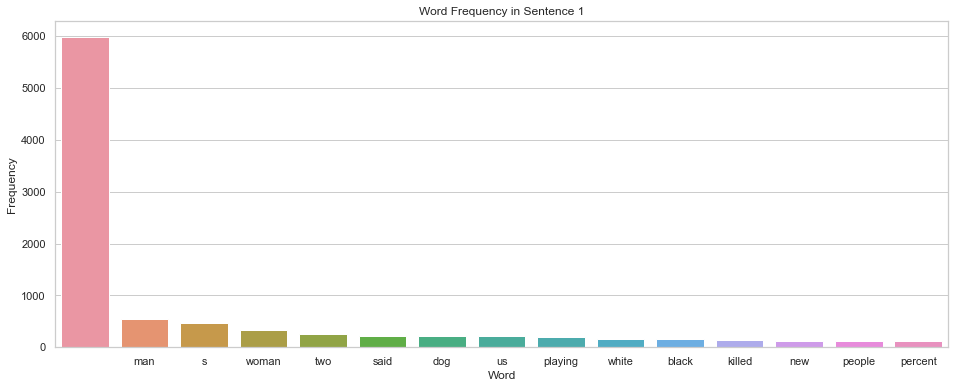

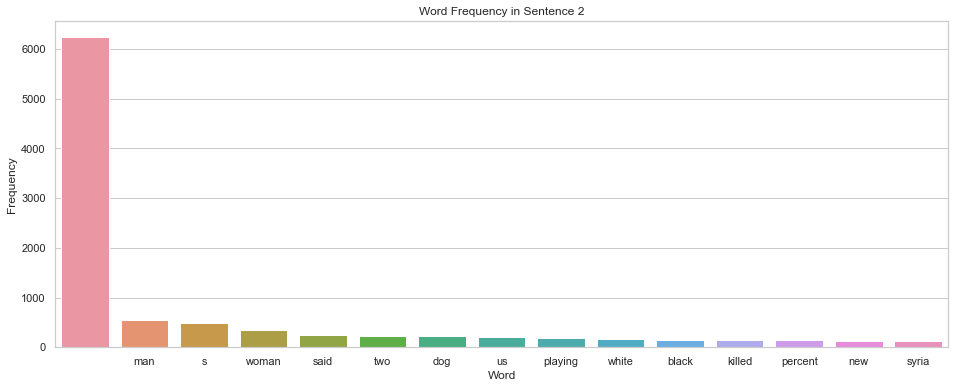

In [19]:
# Training datasete sample, I used bar plot that represented the Top 15 frequent words in sentence 1 and 2 in training dataset
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Word Frequency in Sentence 1")
ax = sns.barplot(x="Word", y="Frequency", data = word_freq_sentence1[:15])

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Word Frequency in Sentence 2")
ax = sns.barplot(x="Word", y="Frequency", data=word_freq_sentence2[:15])

In [20]:
# Distribution of training, testing and dev 
print("Training dataset distribution: ")
print(sentence_train.Similarity_score.value_counts())

Training dataset distribution: 
0.000000    367
4.000000    350
3.000000    308
5.000000    265
3.800000    263
           ... 
3.933000      1
2.830000      1
0.944000      1
4.571000      1
3.333333      1
Name: Similarity_score, Length: 139, dtype: int64


In [21]:
print("Testing dataset distribution: ")
print(sentence_test.Similarity_score.value_counts())

Testing dataset distribution: 
0.000    112
4.000    107
5.000     97
2.000     93
3.000     87
        ... 
2.670      1
4.222      1
1.300      1
0.533      1
3.176      1
Name: Similarity_score, Length: 70, dtype: int64


In [22]:
print("Dev dataset distribution: ")
print(sentence_dev.Similarity_score.value_counts())

Dev dataset distribution: 
0.000    139
3.000     86
3.200     63
2.600     61
3.800     60
        ... 
4.667      1
1.154      1
2.692      1
1.670      1
1.667      1
Name: Similarity_score, Length: 78, dtype: int64


In [23]:
# skip the sample with "-" in training and dev dataset
sentence_train = (sentence_train[sentence_train.Similarity_score != "-"].sample(frac = 1.0, random_state = 42).
                 reset_index(drop = True))
sentence_dev = (sentence_dev[sentence_dev.Similarity_score != "-"].sample(frac = 1.0, random_state = 42).
                 reset_index(drop = True))

In [24]:
# Testing BERT for semantic similarity
# !pip install -U sentence-transformers
import torch
from sentence_transformers import SentenceTransformer
from scipy.spatial import distance

In [25]:
# Load BERT model
# https://pypi.org/project/sentence-transformers/
model = SentenceTransformer('distilbert-base-nli-mean-tokens') 

In [26]:
sentence_train = pd.pandas.read_table(
    '/Users/dz/Desktop/MSCourses/CMPE255DataMining/Project/datasets/sts-train.csv', error_bad_lines=False,
    skip_blank_lines=True, usecols=[4, 5, 6], names=["Similarity_score", "Sentence_1", "Sentence_2"])

In [27]:
# check training dataset that will be using later
sentence_train.head()

,Similarity_score,Sentence_1,Sentence_2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.


In [28]:
# Ignore this part, this is for testing
sentence_train.tail()

,Similarity_score,Sentence_1,Sentence_2
5706,0.0,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,0.0,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,0.0,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,0.0,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders
5710,0.0,Putin spokesman: Doping charges appear unfounded,The Latest on Severe Weather: 1 Dead in Texas ...


In [29]:
# Compare two sentence with BERT and traing dataset
sen1 = sentence_train.loc[5][1]
sen2 = sentence_train.loc[5][2]
sen3 = sentence_train.loc[30][1]
sen4 = sentence_train.loc[30][2]

print(f'sentence1 = {sen1}')
print(f'sentence2 = {sen2}')
print('\n')
print(f'sentence3 = {sen3}')
print(f'sentence4 = {sen4}')

sentence1 = Some men are fighting.
sentence2 = Two men are fighting.


sentence3 = A man is riding a mechanical bull.
sentence4 = A man rode a mechanical bull.


In [30]:
# implement BERT embedding model to compare them
sen1_embedding = model.encode(sen1)
sen2_embedding = model.encode(sen2)
sen3_embedding = model.encode(sen3)
sen4_embedding = model.encode(sen4)

print(f'sentence1 vs sentence2 = {distance.cosine(sen1_embedding,sen2_embedding)}')
print(f'Human score = {sentence_train.loc[0][0]}')
print(f'SentenceBERT Score = {round((1 - distance.cosine(sen1_embedding,sen2_embedding)) * 5, 1)}')

print(f'sentence3 vs sentence4 = {distance.cosine(sen3_embedding,sen4_embedding)}')
print(f'Human score = {sentence_train.loc[45][0]}')
print(f'SentenceBERT Score = {round((1 - distance.cosine(sen3_embedding,sen4_embedding)) * 5,1)}')

print(f'sentence1 vs sentence3 = {distance.cosine(sen1_embedding,sen3_embedding)}')
print(f'sentence1 vs sentence4 = {distance.cosine(sen1_embedding,sen4_embedding)}')

sentence1 vs sentence2 = 0.013049066066741943
Human score = 5.0
SentenceBERT Score = 4.9
sentence3 vs sentence4 = 0.02745002508163452
Human score = 1.0
SentenceBERT Score = 4.9
sentence1 vs sentence3 = 0.42566025257110596
sentence1 vs sentence4 = 0.4607546329498291


In [31]:
# Compare two sentence with BERT and dev dataset
sentence_dev = pd.pandas.read_table(
    '/Users/dz/Desktop/MSCourses/CMPE255DataMining/Project/datasets/sts-train.csv', error_bad_lines=False, skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["Similarity_score", "Sentence_1", "Sentence_2"])

# removes punctuation from sentences
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [32]:
# convert data to string
sentence_dev['Sentence_1'] = sentence_dev['Sentence_1'].astype(str)
sentence_dev['Sentence_2'] = sentence_dev['Sentence_2'].astype(str)

sentence_dev['Sentence_1'] = sentence_dev.apply(lambda row: tokenizer.tokenize(row['Sentence_1']), axis=1)
sentence_dev['Sentence_1'] = sentence_dev.apply(lambda row: ' '.join(row['Sentence_1']).lower() , axis=1)

sentence_dev['Sentence_2'] = sentence_dev.apply(lambda row: tokenizer.tokenize(row['Sentence_2']), axis=1)
sentence_dev['Sentence_2'] = sentence_dev.apply(lambda row: ' '.join(row['Sentence_2']).lower() , axis=1)

In [33]:
sentence_dev.head()

,Similarity_score,Sentence_1,Sentence_2
0,5.00,a plane is taking off,an air plane is taking off
1,3.80,a man is playing a large flute,a man is playing a flute
2,3.80,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...
3,2.60,three men are playing chess,two men are playing chess
4,4.25,a man is playing the cello,a man seated is playing the cello


In [34]:
# Normalize the Similarity_score in dev dataset
dev_similarity_scores = sentence_dev['Similarity_score'].tolist()

score_human = []

for row in dev_similarity_scores:
    score = row / 5
    score_human.append(score)

In [35]:
score_machine = []

for row in sentence_dev.itertuples(index = False):
    sen1_embedding = model.encode(str(row[1]))
    sen2_embedding = model.encode(str(row[2]))
    score = (1 - distance.cosine(sen1_embedding,sen2_embedding))
    score_machine.append(score)


In [36]:
# using pearsonr to compare score
from scipy.stats import pearsonr

result, _ = pearsonr(score_machine, score_human)
print('Pearsonr:', end=' ')
print("%.1f" % (result*100))


Pearsonr: 77.1
